# Ejercicio con regularizadores

In [27]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from tensorflow.keras.layers import Dense
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [28]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist = mnist.load_data()

In [29]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
from keras.utils.np_utils import to_categorical

print (train_images.shape)
print (train_labels.shape)

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 784)
(60000,)


In [30]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

validation_images = train_images[50000:60000]
validation_labels = train_labels[50000:60000]

In [31]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
    model=models.Sequential()
    if regularizador<0 or regularizador>4:
      print('ERROR')
    elif regularizador == 0:
      model. add (layers. Dense(512, activation='relu'))
      model. add (layers. Dense(10, activation='softmax'))
    elif regularizador == 1:
      # Regularización L1
      model.add(layers.Dense(512,kernel_regularizer= regularizers.l1(0.001),activation='relu'))
      model. add (layers. Dense(10, activation='softmax'))
    elif regularizador == 2:
      # Regularización L2
      model.add(layers.Dense(512,kernel_regularizer= regularizers.l2(0.001),activation='relu'))
      model. add (layers. Dense(10, activation='softmax'))
    elif regularizador == 3:
      # Regularización simultánea L1 y L2
      model.add(layers.Dense(16,kernel_regularizer= regularizers.l1_l2(0.001),activation='relu'))
      model. add (layers. Dense(10, activation='softmax'))
    elif regularizador == 4:
      model. add (layers. Dense(512, activation='relu'))
      model.add(layers.Dropout(0.5))
      model. add (layers. Dense(10, activation='softmax'))
    return model

In [32]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer= 'rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

  return modelo

In [33]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history = modelo.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(validation_images,validation_labels))

  return history

In [34]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'b*', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'k', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [35]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'b*', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'm', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [36]:
network0 = crea_modelo(0)

In [37]:
network0 = compila_modelo(network0)

In [38]:
historia0 = entrena_modelo(network0)

Epoch 1/30
469/469 [==============================] - 10s 20ms/step - loss: 0.2576 - accuracy: 0.9264 - val_loss: 0.1227 - val_accuracy: 0.9671
Epoch 2/30
469/469 [==============================] - 5s 12ms/step - loss: 0.1048 - accuracy: 0.9690 - val_loss: 0.0629 - val_accuracy: 0.9810
Epoch 3/30
469/469 [==============================] - 5s 12ms/step - loss: 0.0689 - accuracy: 0.9796 - val_loss: 0.0418 - val_accuracy: 0.9878
Epoch 4/30
469/469 [==============================] - 5s 12ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0316 - val_accuracy: 0.9922
Epoch 5/30
469/469 [==============================] - 5s 12ms/step - loss: 0.0373 - accuracy: 0.9890 - val_loss: 0.0252 - val_accuracy: 0.9927
Epoch 6/30
469/469 [==============================] - 5s 12ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0160 - val_accuracy: 0.9970
Epoch 7/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0224 - accuracy: 0.9935 - val_loss: 0.0137 - val_accuracy: 0.996

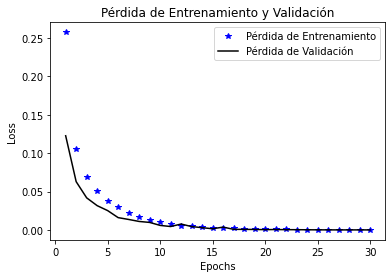

In [39]:
pinta_perdida_entrenamiento_validacion(historia0)

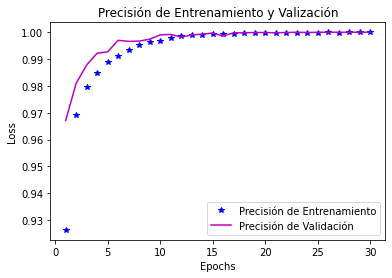

In [40]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [41]:
network1 = crea_modelo(1)

In [42]:
network1 = compila_modelo(network1)

In [43]:
historia1 = entrena_modelo(network1)

Epoch 1/30
469/469 [==============================] - 7s 14ms/step - loss: 1.9469 - accuracy: 0.8497 - val_loss: 0.9773 - val_accuracy: 0.8827
Epoch 2/30
469/469 [==============================] - 6s 14ms/step - loss: 0.9091 - accuracy: 0.8890 - val_loss: 0.7642 - val_accuracy: 0.9212
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.7878 - accuracy: 0.9110 - val_loss: 0.7084 - val_accuracy: 0.9331
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.7157 - accuracy: 0.9231 - val_loss: 0.6575 - val_accuracy: 0.9356
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.6686 - accuracy: 0.9307 - val_loss: 0.6171 - val_accuracy: 0.9452
Epoch 6/30
469/469 [==============================] - 6s 14ms/step - loss: 0.6322 - accuracy: 0.9376 - val_loss: 0.6048 - val_accuracy: 0.9442
Epoch 7/30
469/469 [==============================] - 6s 14ms/step - loss: 0.6063 - accuracy: 0.9417 - val_loss: 0.5666 - val_accuracy: 0.9534

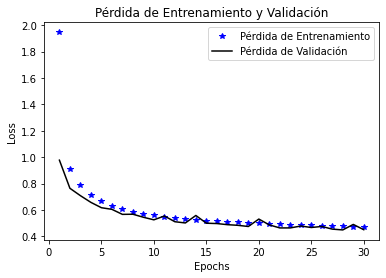

In [44]:
pinta_perdida_entrenamiento_validacion(historia1)

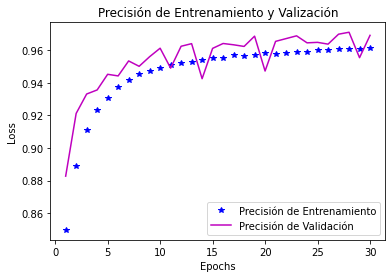

In [45]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [46]:
network2 = crea_modelo(2)

In [47]:
network2 = compila_modelo(network2)

In [48]:
historia2 = entrena_modelo(network2)

Epoch 1/30
469/469 [==============================] - 7s 14ms/step - loss: 0.4802 - accuracy: 0.9210 - val_loss: 0.2831 - val_accuracy: 0.9507
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2417 - accuracy: 0.9576 - val_loss: 0.2115 - val_accuracy: 0.9645
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1978 - accuracy: 0.9645 - val_loss: 0.1762 - val_accuracy: 0.9696
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1779 - accuracy: 0.9684 - val_loss: 0.1530 - val_accuracy: 0.9762
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1672 - accuracy: 0.9700 - val_loss: 0.1471 - val_accuracy: 0.9771
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1578 - accuracy: 0.9726 - val_loss: 0.1397 - val_accuracy: 0.9767
Epoch 7/30
469/469 [==============================] - 6s 14ms/step - loss: 0.1514 - accuracy: 0.9727 - val_loss: 0.1312 - val_accuracy: 0.9813

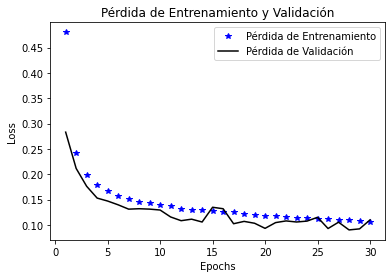

In [49]:
pinta_perdida_entrenamiento_validacion(historia2)

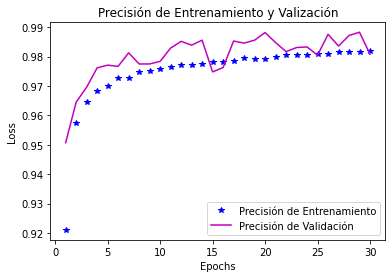

In [50]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [51]:
network3 = crea_modelo(3)

In [52]:
network3 = compila_modelo(network3)

In [53]:
historia3 = entrena_modelo(network3)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 1.1009 - accuracy: 0.8097 - val_loss: 0.7140 - val_accuracy: 0.8958
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.6830 - accuracy: 0.8938 - val_loss: 0.6019 - val_accuracy: 0.9109
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.6081 - accuracy: 0.8996 - val_loss: 0.5490 - val_accuracy: 0.9160
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.5663 - accuracy: 0.9028 - val_loss: 0.5146 - val_accuracy: 0.9159
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.5371 - accuracy: 0.9057 - val_loss: 0.4912 - val_accuracy: 0.9196
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.5157 - accuracy: 0.9070 - val_loss: 0.4873 - val_accuracy: 0.9174
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4989 - accuracy: 0.9096 - val_loss: 0.4637 - val_accuracy: 0.9203
Epoch 

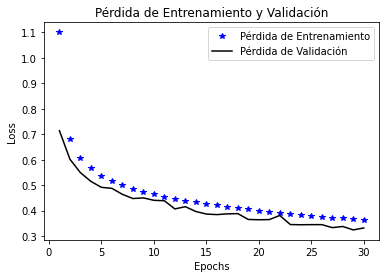

In [54]:
pinta_perdida_entrenamiento_validacion(historia3)

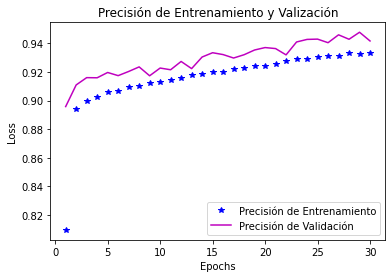

In [55]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [56]:
network4 = crea_modelo(4)

In [57]:
network4 = compila_modelo(network4)

In [58]:
historia4 = entrena_modelo(network4)

Epoch 1/30
469/469 [==============================] - 7s 13ms/step - loss: 0.3134 - accuracy: 0.9084 - val_loss: 0.1320 - val_accuracy: 0.9625
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1528 - accuracy: 0.9549 - val_loss: 0.0857 - val_accuracy: 0.9763
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.1169 - accuracy: 0.9661 - val_loss: 0.0646 - val_accuracy: 0.9807
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0996 - accuracy: 0.9701 - val_loss: 0.0543 - val_accuracy: 0.9829
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0863 - accuracy: 0.9750 - val_loss: 0.0458 - val_accuracy: 0.9861
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0783 - accuracy: 0.9773 - val_loss: 0.0397 - val_accuracy: 0.9886
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0709 - accuracy: 0.9784 - val_loss: 0.0335 - val_accuracy: 0.9908

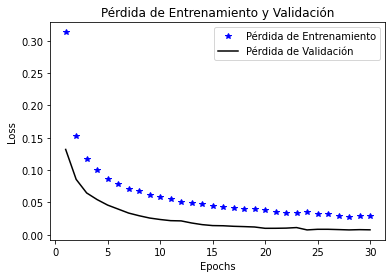

In [59]:
pinta_perdida_entrenamiento_validacion(historia4)

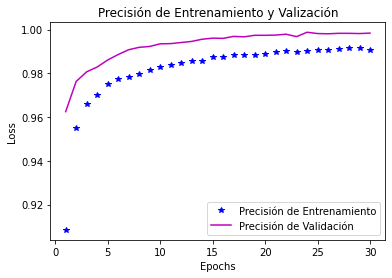

In [60]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [61]:
network5 = crea_modelo(5)

ERROR


### CONCLUSIONES

Una vez entrenados los modelos, las métricas Loss y Accuracy nos indicarán cómo es el progreso del entrenamiento a lo largo de las epochs. 

Accuracy nos calculará las etiquetas que han sido adivinadas de manera correcta, podemos ver que a medida que se calculan las epochs va aumentando el valor hasta llegar al máximo, es decir, cada vez nuestro modelo tiene más precisión respecto a los datos de entrenamiento.

Val_Accuracy calcula la precisión del modelo con respecto a datos nuevos, es decir, distintos a los datos de entrenamiento, no los ha visto nunca. Es esto lo que nos puede dar señales de que se está produciendo el efecto del sobreentrenamiento (Overfitting) a partir de un número de epochs. 


*   Sin regularizador: la máxima precisión de los datos de entrenamiento es de un 100% en la época 28. Para los datos que el modelo no ha visto nunca se alcanza el 100% de precisión en la época 23.

*   Regularizador l1: En este modelo el máximo valor de precisión (accuracy) es 0.9611 en la última época, y su precisión respecto a datos que no ha visto nunca es 0.9691. Es decir, es más preciso con datos nunca (val_accuracy) que con los propios de entrenamiento.

*   Regularizador l2: En este caso el máximo valor de precisión es 0.9821 en la última época para los datos de entrenamiento, mientras que para respecto a los datos nuevos la máxima precisión es 0.9883 en la penúltima capa.
Sin embargo, en la época 20 alcanza el valor 0.9882, un valor muy cercano

*   Regularizador l1 y l2: En este modelo encontramos para los datos de entrenamiento una precisión máxima en la última época, de 0.9333. Este valor es menor a los modelos anteriores. 
Por otro lado, para los datos que el modelo no ha visto nunca la máxima precisión es de 0.9477 en la penúltima época. También es un valor menor a los anteriores.
 
*   Dropout: Añadiendo un dropout del 50% encontramos una máxima precisión de 0.9918 en la época 28 en los datos de entrenamiento, y una precisión de 0.9988 en la época 24

Por tanto, a la hora de elegir un modelo conseguimos la máxima precisión sin el uso de regularizadores, pues tiene un 100% de precisión.

Si quisiéramos usar técnicas de regularización para, por ejemplo, evitar Overfitting o arreglar fluctuaciones me decanto por el Regularizador l2, pues es aquel que da mayor precisión al modelo, tanto a los datos de entrenamiento como a los nuevos datos, además alcanza estos valores antes que los otros. 